In [6]:
# tools
import pandas as pd
import missingno as msno

In [2]:
# func
from pathlib import Path

In [32]:
# plot
import seaborn as sns

In [3]:
raw_data = Path('..') / 'data' / 'raw'

In [25]:
installs = pd.read_csv(raw_data / 'installs.csv.gzip', compression='gzip', parse_dates=['created'])

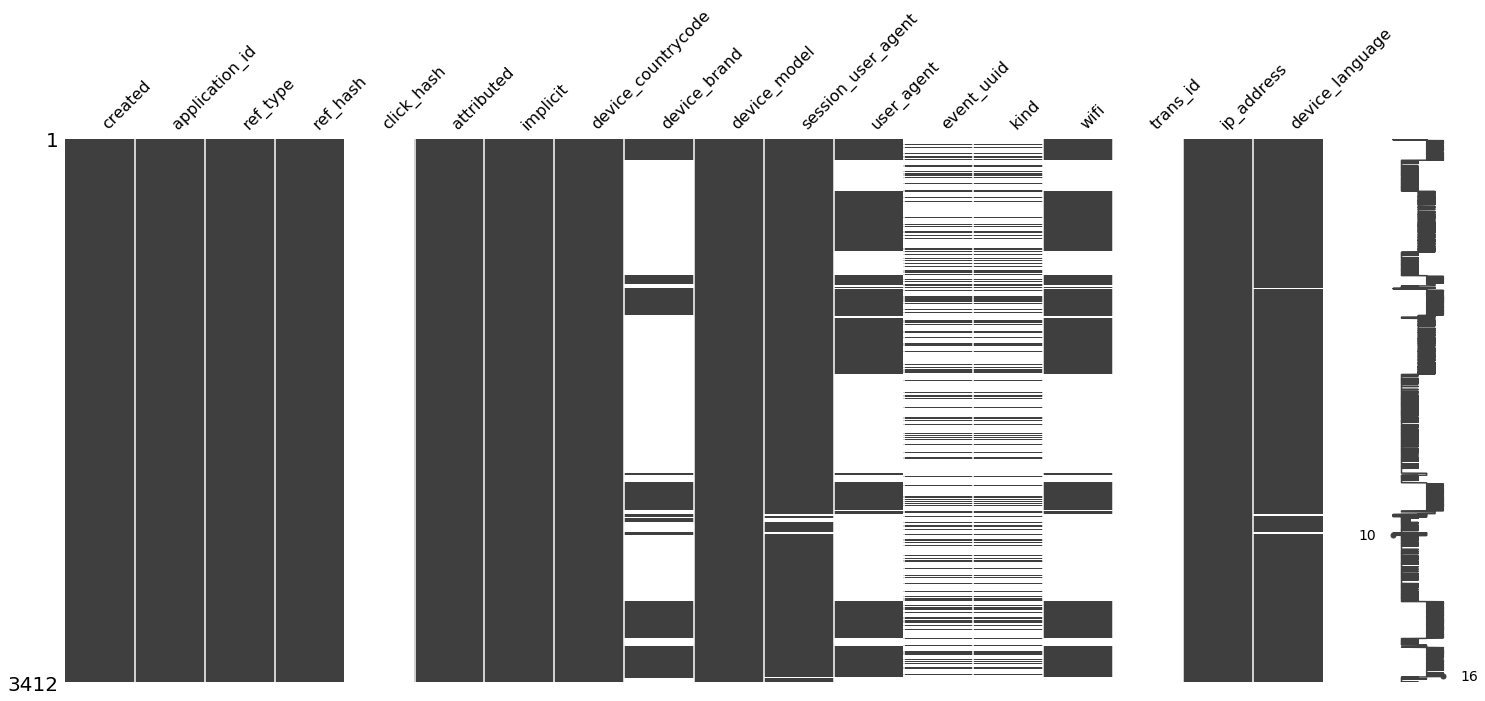

In [9]:
msno.matrix(installs)

In [33]:
temp = (installs.assign(day=installs.created.dt.dayofyear, hour=installs.created.dt.hour)
                .groupby(['day', 'hour']).size().to_frame('count').reset_index().reset_index())

In [35]:
temp = (temp.pivot(index='day', columns='hour', values='count')
            .fillna(0)
            .stack()
            .to_frame('count')
            .reset_index()
            .reset_index()
            .assign(weekend = temp.day.map(lambda x: 1 if x in [68,69] else 0)))

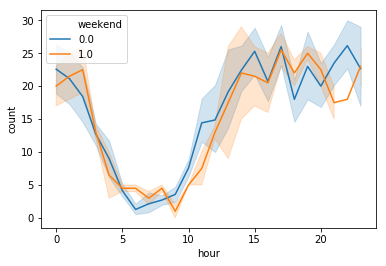

In [37]:
sns.lineplot('hour', 'count', hue='weekend', data=temp)

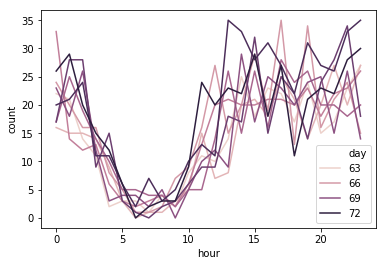

In [38]:
sns.lineplot('hour', 'count', hue='day', data=temp, )